In [2]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xs = np.linspace(0, 1, 100)

Piecewise linear functions (trimf and trapmf) - great for representing sets like "almost equal", "in an interval". 

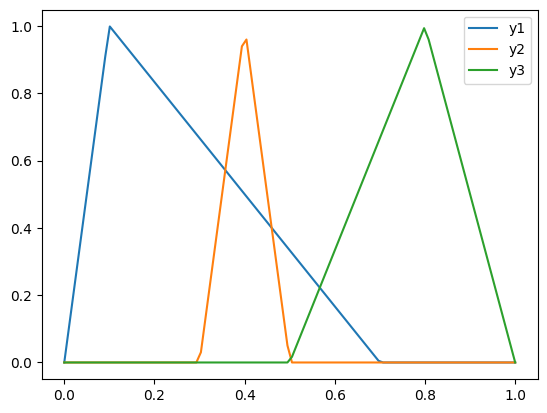

In [4]:
y_1 = fuzz.trimf(xs, [0, 0.1, 0.7])
y_2 = fuzz.trimf(xs, [0.3, 0.4, 0.5])
y_3 = fuzz.trimf(xs, [0.5, 0.8, 1])

plt.plot(xs, y_1, label="y1")
plt.plot(xs, y_2, label="y2")
plt.plot(xs, y_3, label="y3")

plt.legend()
plt.show()

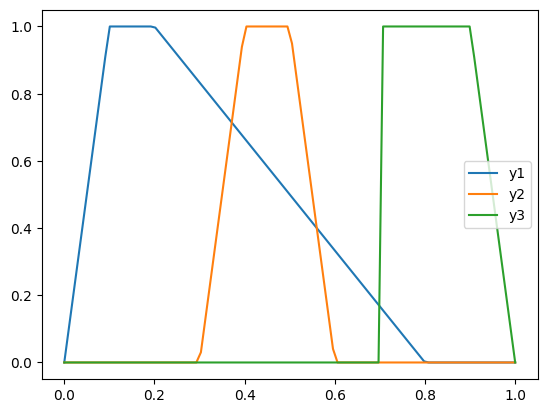

In [5]:
y_1 = fuzz.trapmf(xs, [0, 0.1, 0.2, 0.8])
y_2 = fuzz.trapmf(xs, [0.3, 0.4, 0.5, 0.6])
y_3 = fuzz.trapmf(xs, [0.7, 0.7, 0.9, 1 ])

plt.plot(xs, y_1, label="y1")
plt.plot(xs, y_2, label="y2")
plt.plot(xs, y_3, label="y3")

plt.legend()
plt.show()

Gaussian functions represent symmetric fuzzy sets which are defined by normal distribution properties - dependent on many indpendent variables.

In [6]:
def gauss2mf_non_restricted(x, mean1, sigma1, mean2, sigma2):
    y = np.ones(len(x))
    idx1 = x <= mean1
    idx2 = x > mean2
    y[idx1] = fuzz.gaussmf(x[idx1], mean1, sigma1)
    y[idx2] = fuzz.gaussmf(x[idx2], mean2, sigma2)
    return y

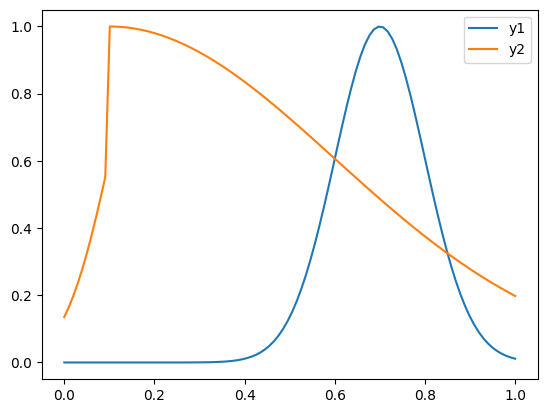

In [7]:
y_1 = fuzz.gaussmf(xs, 0.7, 0.1)
y_2 = gauss2mf_non_restricted(xs, 0.2, 0.1, 0.1, 0.5)

plt.plot(xs, y_1, label="y1")
plt.plot(xs, y_2, label="y2")

plt.legend()
plt.show()

Bell membership function allows for smooth transition between crisp and fuzzy definitions.

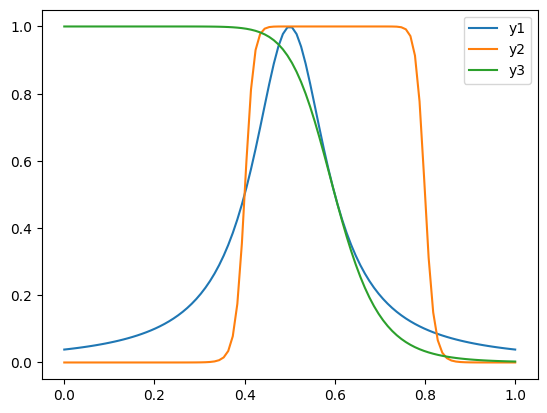

In [8]:
y_1 = fuzz.gbellmf(xs, 0.1, 1, 0.5)
y_2 = fuzz.gbellmf(xs, 0.2, 10, 0.6)
y_3 = fuzz.gbellmf(xs, 0.5, 5, 0.1)

plt.plot(xs, y_1, label="y1")
plt.plot(xs, y_2, label="y2")
plt.plot(xs, y_3, label="y3")

plt.legend()
plt.show()

Sigmoid-based functions allow for asymetric fuzzy sets.

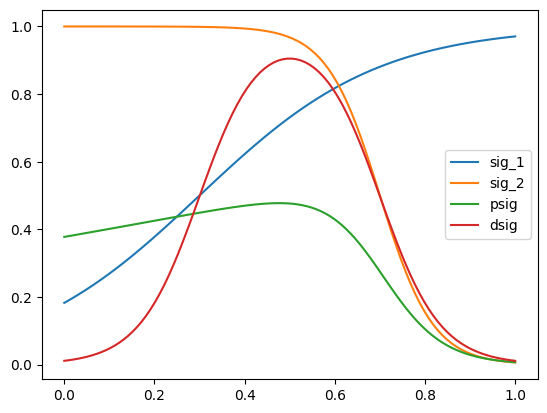

In [9]:
sig_1 = fuzz.sigmf(xs, 0.3, 5)
sig_2 = fuzz.sigmf(xs, 0.7, -17)
psig = fuzz.psigmf(xs, 0.5, 1, 0.7, -15)
dsig = fuzz.dsigmf(xs, 0.7, -15, 0.3, -15)

plt.plot(xs, sig_1, label="sig_1")
plt.plot(xs, sig_2, label="sig_2")
plt.plot(xs, psig, label="psig")
plt.plot(xs, dsig, label="dsig")

plt.legend()
plt.show()

Spline-based functions are used to represent sets where there is an evident monotonicity. 

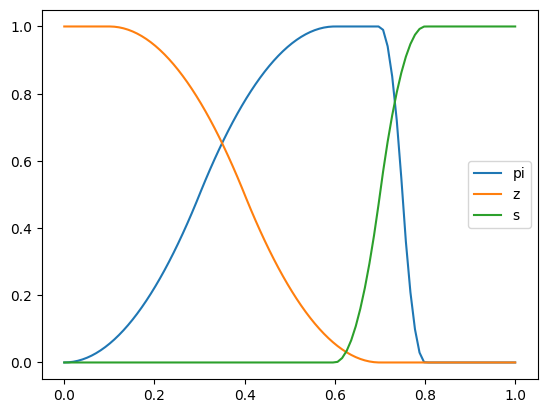

In [10]:
pi = fuzz.pimf(xs, 0, 0.6, 0.7, 0.8)
z = fuzz.zmf(xs, 0.1, 0.7)
s = fuzz.smf(xs, 0.6, 0.8)

plt.plot(xs, pi, label="pi")
plt.plot(xs, z, label="z")
plt.plot(xs, s, label="s")

plt.legend()
plt.show()

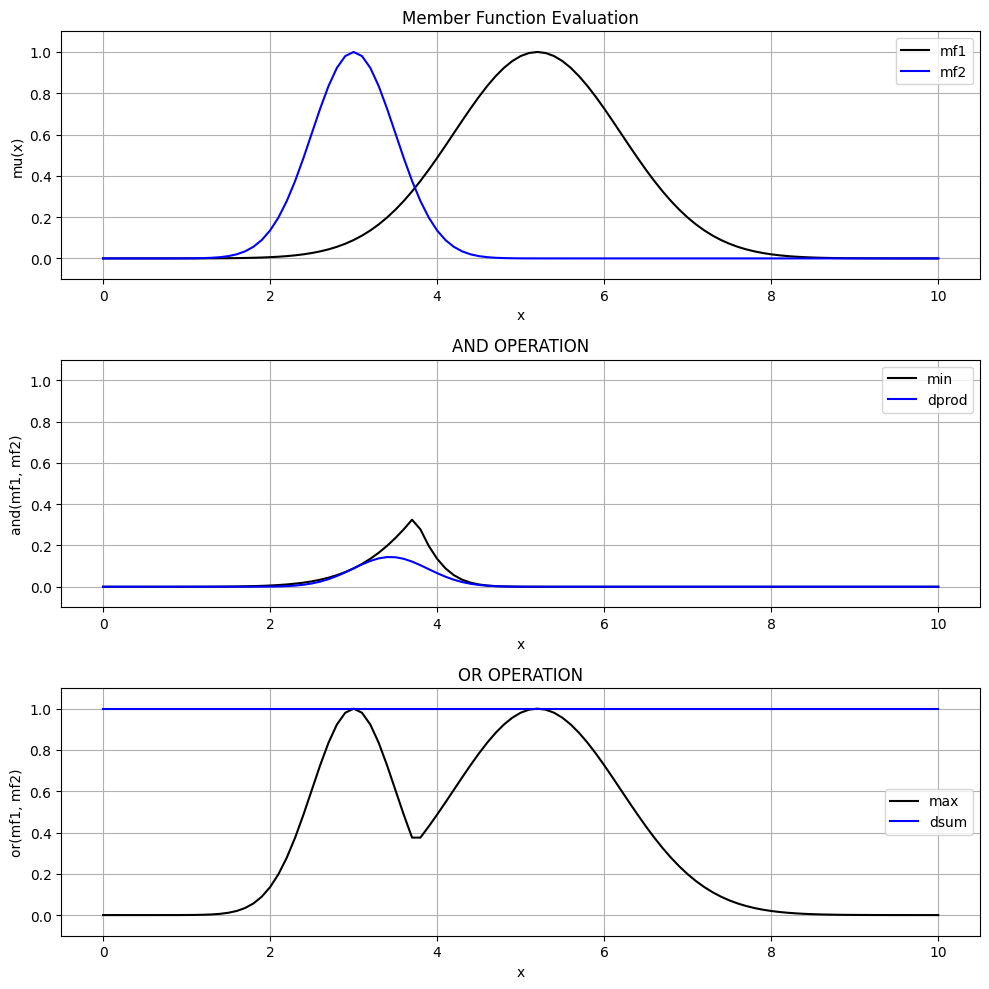

In [11]:
x = np.arange(0, 10.1, 0.1)

y1 = fuzz.gaussmf(x, 5.2, 1)     # Corresponds to gaussmf(x,[1 5.2]) in Scilab
y2 = fuzz.gaussmf(x, 3.0, 0.5)   # Corresponds to gaussmf(x,[0.5 3]) in Scilab

# T-norms (AND)
yy1 = np.fmin(y1, y2)             # min
yy3 = y1 * y2                     # product (dprod)

# S-norms (OR)
yy2 = np.fmax(y1, y2)

yy4 = np.where(
    (y1 == 0), y2, np.where((y2== 0), y1, 1)
)

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(x, y1, 'k', label='mf1')
plt.plot(x, y2, 'b', label='mf2')
plt.title('Member Function Evaluation')
plt.xlabel('x')
plt.ylabel('mu(x)')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(x, yy1, 'k', label='min')
plt.plot(x, yy3, 'b', label='dprod')
plt.title('AND OPERATION')
plt.xlabel('x')
plt.ylabel('and(mf1, mf2)')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(x, yy2, 'k', label='max')
plt.plot(x, yy4, 'b', label='dsum')
plt.title('OR OPERATION')
plt.xlabel('x')
plt.ylabel('or(mf1, mf2)')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.grid(True)

plt.tight_layout()
plt.show()

The AND (T-norm) operation helps us model the intersection or joint satisfaction of conditions—for example, when something MUST be both "tall" and "heavy".

The OR (S-norm) operation models the union or satisfaction of at least one condition, like when something can be EITHER "hot" or "humid".

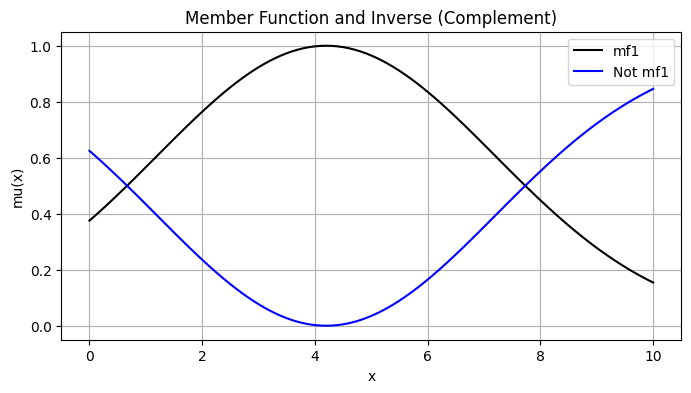

In [12]:
y1 = fuzz.gaussmf(x, 4.2, 3)
y2 = 1 - y1  # complement

plt.figure(figsize=(8, 4))
plt.plot(x, y1, 'k', label='mf1')
plt.plot(x, y2, 'b', label='Not mf1')
plt.title('Member Function and Inverse (Complement)')
plt.xlabel('x')
plt.ylabel('mu(x)')
plt.legend()
plt.grid(True)
plt.show()

The Complement operation is used to express the opposite of a fuzzy concept, such as turning "high temperature" into "not high temperature."